# Credit Risk Modeling with different ML & DL models

*In this notebook, I am going to show you that how different ML & DL models   perform on a credit risk modeling dataset, where we will predict which of the customers will have their loan approved.*

*This is going to be a binary classification problem where the model will learn to predict the Loan_Status of a person, based on information available.*

*The dataset has 614 rows and 13 different features, including the **target variable(Loan_Status)**. The data contains following features in it:* 



1.   **Loan_ID**: A unique loan id
2.   **Gender**: Male/Female
3.   **Married:**Yes/No
4.   **Dependents:**Number of poeple depending on applicant
5.   **Education:**Applicant's education--Graduate/Not Gradudate
6.   **Self_Employed:**Yes/No
7.   **AppicantIncome:** Income of applicant($)

8.   **CoapplicantIncome:**Income of co-applicant($)

9.   **LoanAmount:**Loan amount($ thousands)
10.  **Loan_Amount_Term**:Term for borrowing money(weeks)
11.  **Credit_History:**Applicant's credit history 
12.  **Property_Area:**Urban/Rural/Semi
13.  **Loan_Status:**Loan Approved (Yes/No)






*First I am going to import some important libraries, then I will do some exploratory data analysis, then a bit of feature engineering followed by creating models and evaluating them on test set.*

# Importing Libraries


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras import models,layers


# Exploratory Data Analysis

In [5]:
train=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(train.shape)

(614, 13)


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


***The following illustration illustrates that from the data provided almost 69% of the loan applications were approved.***

Proportion of loan applications approved:  68.72964169381108
Proportion of loan applications rejected:  31.27035830618892


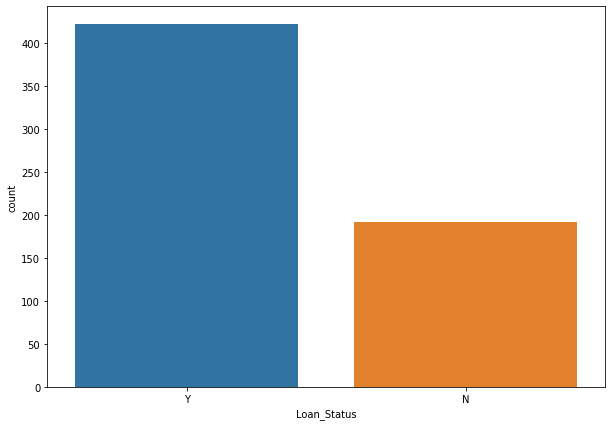

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x='Loan_Status',data=train)
print('Proportion of loan applications approved: ',train.Loan_Status.value_counts()[0]/len(train)*100)
print('Proportion of loan applications rejected: ',train.Loan_Status.value_counts()[1]/len(train)*100)

***The following 2 distribution plots indicate that majority of those people have submitted an application for loan who have income between 0 & 10000($).***

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

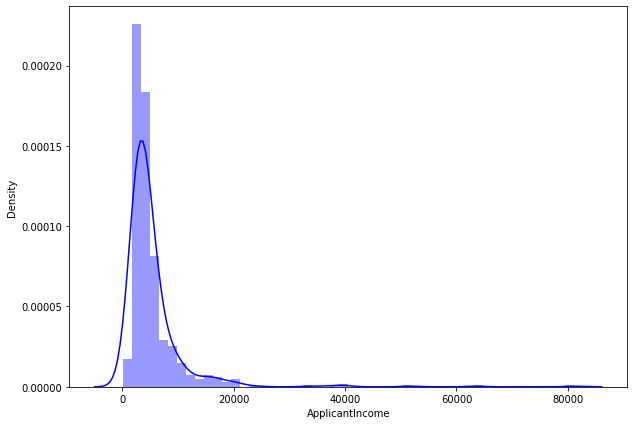

In [10]:
plt.figure(figsize=(10,7))
sns.distplot(train['ApplicantIncome'],color='Blue')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

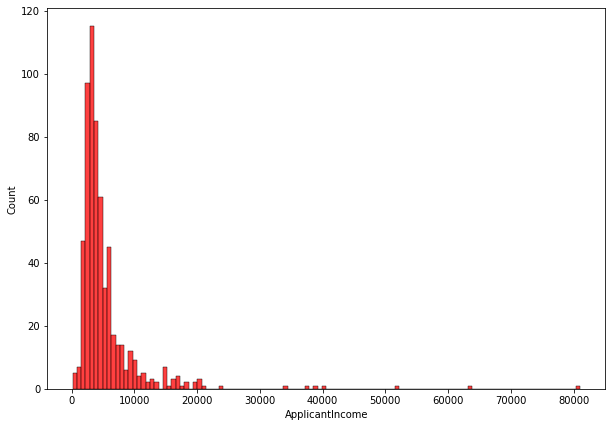

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(x='ApplicantIncome',data=train,color='Red')

***The following distribution plots show that majority of people wanted a loan between 100,000 & 200,000($).***

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

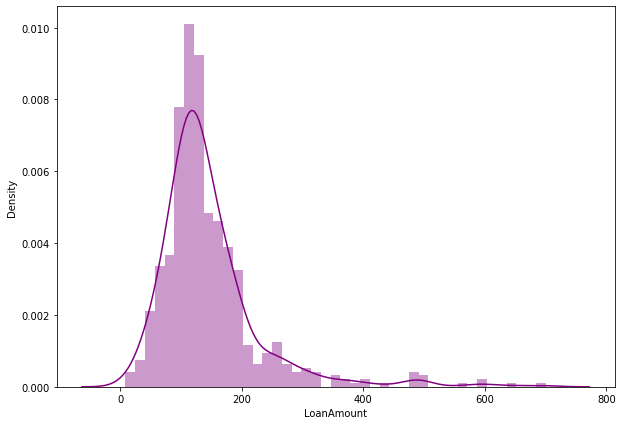

In [12]:
plt.figure(figsize=(10,7))
sns.distplot(train['LoanAmount'],color='purple')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

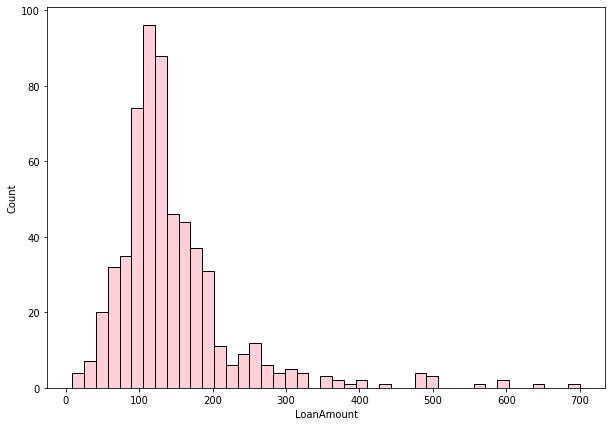

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(data=train,x='LoanAmount',color='pink')

***The following scatterplot between applicant's income and loan amount indicates that mainly people wanted to have a lesser loan. This is shown by the distribution of points at left bottom of the figure. We can also see that loan status is not affected by the amount of loan or applicant's income. It varies through out the data.***

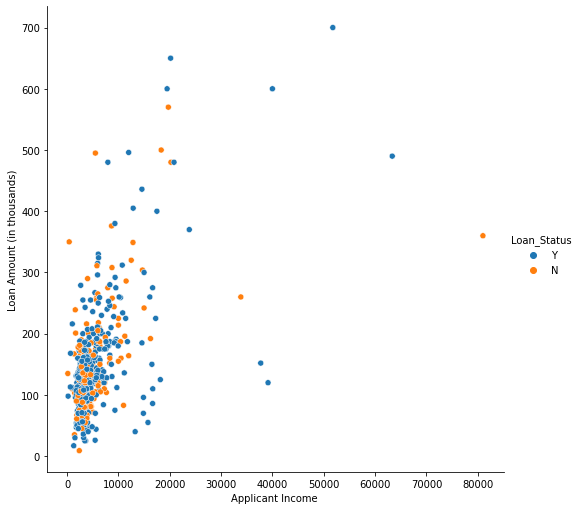

In [14]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',data=train,hue='Loan_Status',height=7.0)
plt.xlabel('Applicant Income ')
plt.ylabel('Loan Amount (in thousands)')
plt.show()

***The following illustration indicates that there were more Male candidates for loan application as compared to Females, but the loan status is not much affected by it as there is almost same proportion of rejections in both the cases.***

<AxesSubplot:xlabel='Gender', ylabel='count'>

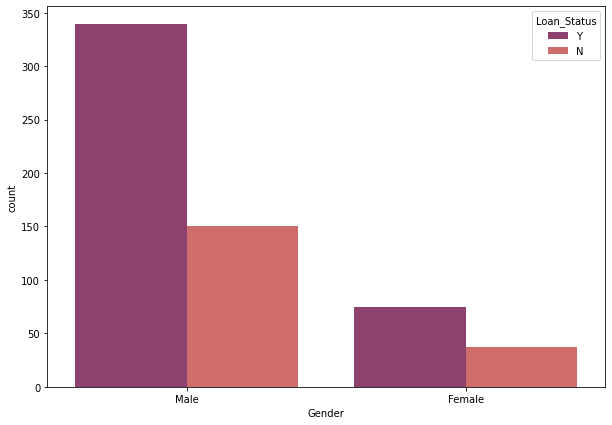

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=train,hue='Loan_Status',palette='flare_r')

***The following illustration illustrates that mainly those applicant's application for loan was approved who were not married. So if someone is not married, that person has greater chance for loan to be approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


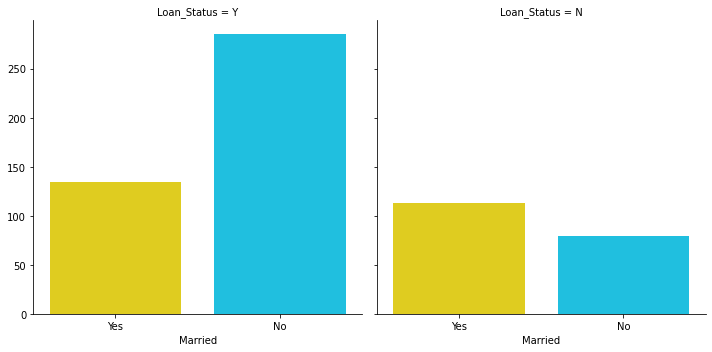

In [16]:
grid=sns.FacetGrid(data=train,col='Loan_Status',height=5.0)
grid.map(sns.countplot,'Married',palette='jet_r')


***The following figure indicates that those who had no dependents got their loan approved compared to those who had. So if someone has no dependents, that person has greater chance for loan to be approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dependents', ylabel='count'>

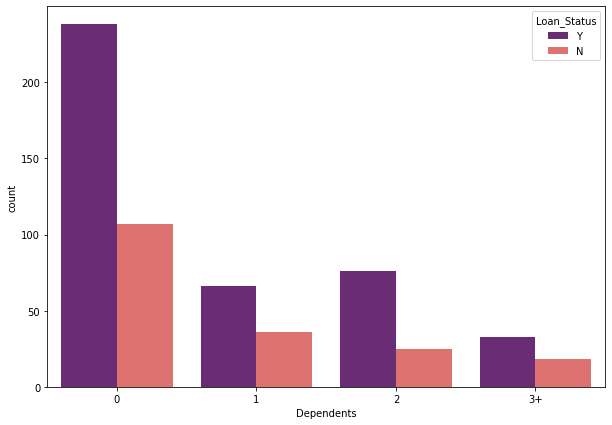

In [17]:
plt.figure(figsize=(10,7))
sns.countplot('Dependents',data=train,hue='Loan_Status',palette='magma')

***The following plot gives an idea about the people's education. It explains that those people who were graduate, had greater chance for their loan to be approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

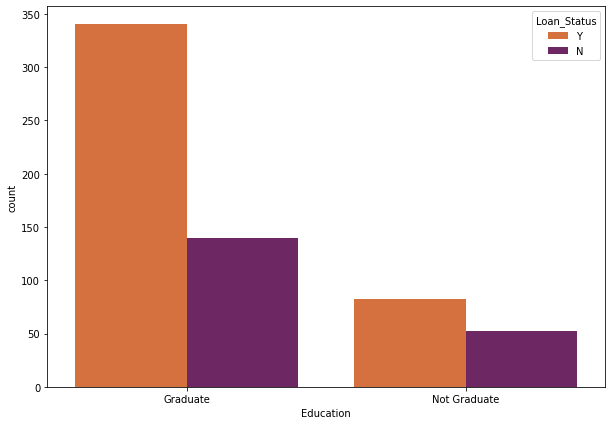

In [18]:
plt.figure(figsize=(10,7))
sns.countplot('Education',data=train,hue='Loan_Status',palette='inferno_r')

***The following figure suggests that people who were not self employed were given more preference over those who were self employed. If someone is not self employed, that person has more chance for getting loan approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


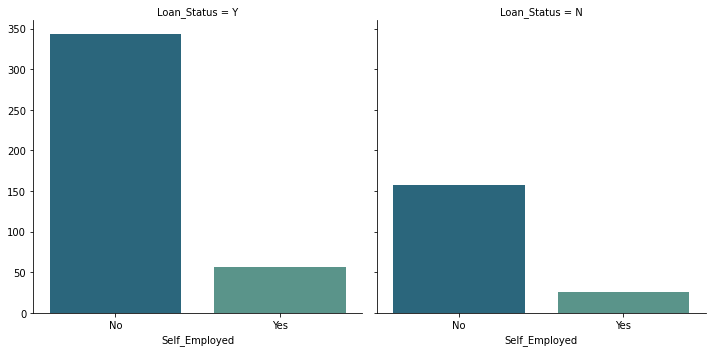

In [19]:
grid=sns.FacetGrid(data=train,col='Loan_Status',height=5.0)
grid.map(sns.countplot,'Self_Employed',palette='crest_r')

***The following plot suggests that those people's loan application was more accepted who had borrowed it for 360(weeks) compared to those who had borrowed it for less term.So if one borrows it for this much time period, that person has greater chance for loan to be approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


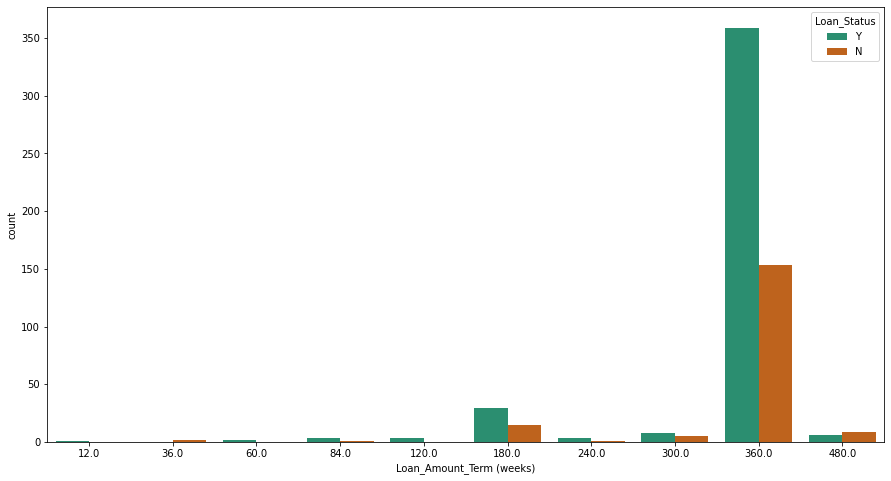

In [20]:
plt.figure(figsize=(15,8))
sns.countplot('Loan_Amount_Term',data=train,hue='Loan_Status',palette='Dark2')
plt.xlabel('Loan_Amount_Term (weeks)')
plt.show()

***The following plot shows the relationship between credit history and loan status. It suggests that those who had bad credit history didnt get their loan application approved compared to those who had god credit history. So if anyone has bad credit history, that person might have to face disappointment.***

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


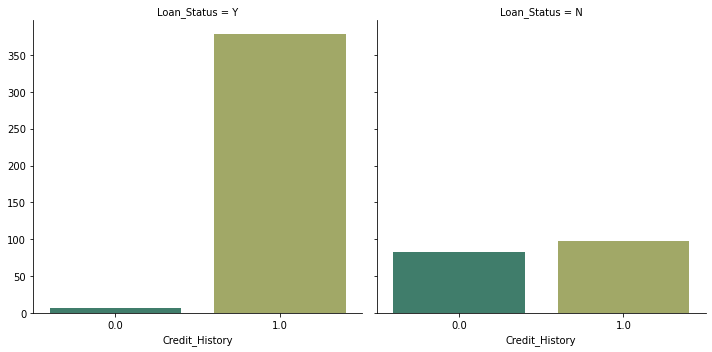

In [21]:
grid=sns.FacetGrid(data=train,col='Loan_Status',height=5.0)
grid.map(sns.countplot,'Credit_History',palette='gist_earth');

***This count plot illustrates the property area applicants have. This feature is not showing any relation with loan status as people who had different property area got their applications approved. Through property area it cannot be distinguised that who's application has more chance of being approved.***

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


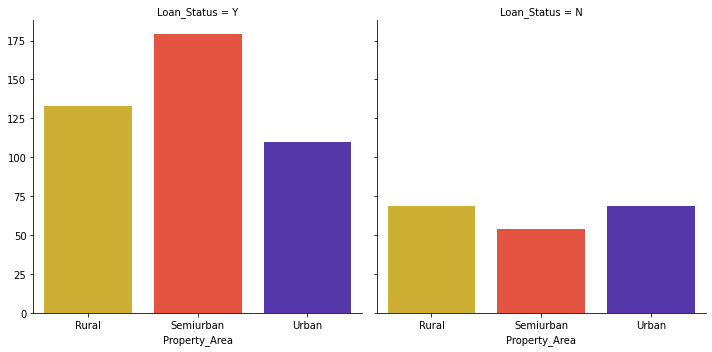

In [22]:
grid=sns.FacetGrid(data=train,col='Loan_Status',height=5.0)
grid.map(sns.countplot,'Property_Area',palette='CMRmap_r');

***Having a look at heatmap gives relationship between different integer/float datatype features. At this moment, it is not showing other features as they have object datatype.Later in this notebook we will see it in more detail.***

<AxesSubplot:>

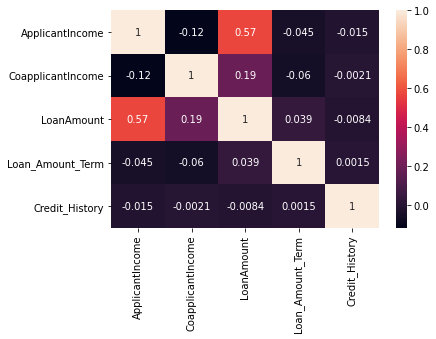

In [23]:
sns.heatmap(train.corr(),annot=True)

# Cleaning Data

***There are alot of null values in the dataset, so we will have to deal with them.***

In [24]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***Those features who had only 2 unique values, I got their null values filled by their mode value. Whereas I got LoanAmount feature's null values filled by its median, because it may have outliers and taking average could divert our model from correctly predicting.***

In [25]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [26]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Our model only accepts tensors/numeric data, so I will use LabelEncoder module of sklearn library to encode the object datatype features. This will change their datatype to integer as well.***

In [27]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
object_col=train.select_dtypes('object').columns
le=LabelEncoder()
for col in object_col:
  train[col]=le.fit_transform(train[col])

In [29]:
train.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [30]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**Standardizing columns which have variant values**

In [31]:
cols=['CoapplicantIncome','LoanAmount','ApplicantIncome']
sc=StandardScaler()
for col in cols:
    train[col]=sc.fit_transform(train[col].values.reshape(-1,1))
train.head()    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,360.0,1.0,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,360.0,1.0,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,360.0,1.0,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,360.0,1.0,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,360.0,1.0,2,1


***Now we will have a detailed look at heatmap diagram. It contains all features in it now because we recently encoded the object datatypes and they are converted to integer.***

***The heatmap suggests that their is high positive corelation between applicant's income and loan amount. The more the applicant's income is, the more loan amount he wants to have approved.***

***This also shows high positive corelation between loan status and credit history. The more good the credit history a person has, there is high chance for his loan to be approved. We also found this insight previously in countplot diagram of credit history and loan status.***

***The more darker the color is, there is more negative correlation. The more lighter it is, there is more positive correlation between the features.***

<AxesSubplot:>

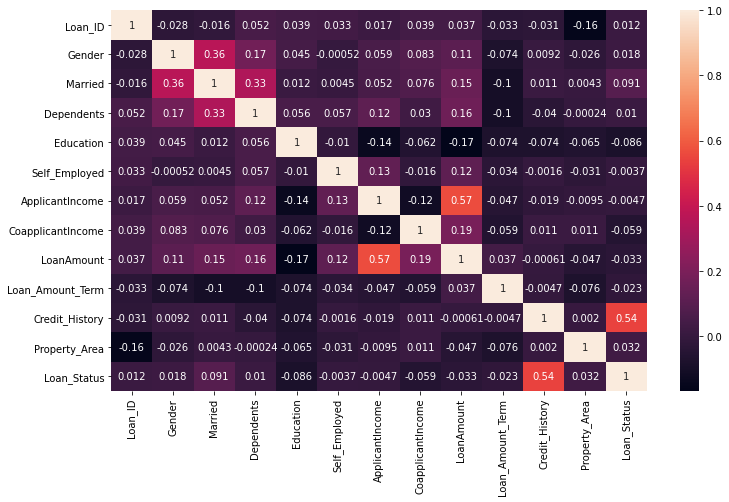

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(),annot=True)

# Feature Engineering

***From the data, I am going to remove the Loan_ID and Property_Area feature because the heatmap suggests that these two features dont have any strong effect on any other feature.***

In [33]:
train.drop('Loan_ID',axis=1,inplace=True)
train.drop('Property_Area',axis=1,inplace=True)

In [34]:
y_train=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
x_train=train

***Now I am going to split my data into train data(for training models) and test data(for evaluating models) with the help of sklearn's module, train_test_split. I will be splitting data in to 60 40 ratio. 60% for training and 40% for testing. The parameter stratify will make sure that both train and test data have equal proportion of target variables.***

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,stratify=y_train,test_size=0.4)

print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_test is {y_test.shape}')  

Shape of x_train is (368, 10)
Shape of y_train is (368,)
Shape of x_test is (246, 10)
Shape of y_test is (246,)


***We can see that there is equal proportion of target variables in both datasets.This makes the data balanced,so easier and more effective for our model to make predictions.***

In [36]:
print('Proportion of 0 in y_train :',y_train.value_counts()[0]/ len(y_train))
print('Proportion of 0 in y_test :',y_test.value_counts()[0]/ len(y_test))
print('Proportion of 1 in y_train :',y_train.value_counts()[1]/ len(y_train))
print('Proportion of 1 in y_test :',y_test.value_counts()[1]/ len(y_test))


Proportion of 0 in y_train : 0.3125
Proportion of 0 in y_test : 0.3130081300813008
Proportion of 1 in y_train : 0.6875
Proportion of 1 in y_test : 0.6869918699186992


# Creating ML/DL models

**Logistic Regression**

Accuracy on test data  0.8089430894308943
Accuracy on train data  0.8097826086956522
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        77
           1       0.79      0.99      0.88       169

    accuracy                           0.81       246
   macro avg       0.86      0.70      0.73       246
weighted avg       0.84      0.81      0.78       246



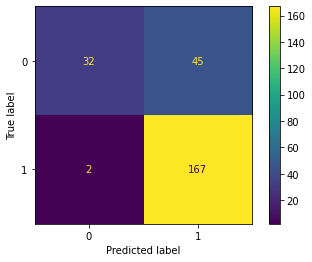

In [64]:
model1=LogisticRegression()
parameters={'penalty':['l2','l1'],'solver':['liblinear'],'C':[1,2,3]}
gscv1=GridSearchCV(model1,param_grid=parameters)
gscv1.fit(x_train,y_train)
y_pred=gscv.predict(x_test)
cf_r=classification_report(y_test,y_pred)
print('Accuracy on test data ', model.score(x_test,y_test))
print('Accuracy on train data ', model.score(x_train,y_train))
print(plot_confusion_matrix(gscv,x_test,y_test,values_format='0.3g'))
print('Classification Report :\n',cf_r)



In [68]:
gscv1.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

**Support Vector Machine**

Accuracy on test data  0.8089430894308943
Accuracy on train data  0.8097826086956522
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        77
           1       0.79      0.99      0.88       169

    accuracy                           0.81       246
   macro avg       0.86      0.70      0.73       246
weighted avg       0.84      0.81      0.78       246



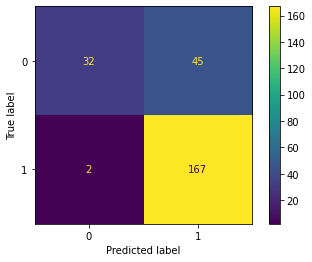

In [77]:
model2=SVC()
parameters={'C':[1,2,3],'kernel':['linear','poly','rbf'],'degree':[1,2,3,4]}
gscv2=GridSearchCV(model2,param_grid=parameters)
gscv2.fit(x_train,y_train)
y_pred=gscv2.predict(x_test) 
cf_r=classification_report(y_test,y_pred)
print('Accuracy on test data ', gscv2.score(x_test,y_test))
print(plot_confusion_matrix(gscv2,x_test,y_test,values_format='0.3g'))
print('Accuracy on train data ', gscv2.score(x_train,y_train))
print('Classification Report :\n',cf_r)




In [59]:
gscv2.best_params_

{'C': 1, 'degree': 1, 'kernel': 'linear'}

**Decision Tree**

Accuracy on test data  0.8089430894308943
Accuracy on train data  0.8097826086956522
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.42      0.58        77
           1       0.79      0.99      0.88       169

    accuracy                           0.81       246
   macro avg       0.86      0.70      0.73       246
weighted avg       0.84      0.81      0.78       246



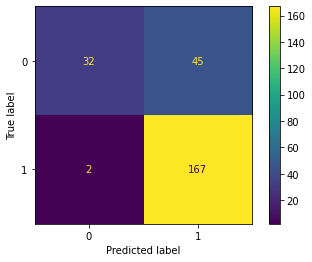

In [145]:
model3=DecisionTreeClassifier(random_state=42)
parameters={'max_depth':[15,17,19],'min_samples_leaf':[11,13,15,17,25],'min_samples_split':[18,20,22]}
gscv3=GridSearchCV(model3,param_grid=parameters)
gscv3.fit(x_train,y_train)
y_pred=gscv3.predict(x_test)
cf_r=classification_report(y_test,y_pred)  
print('Accuracy on test data ', gscv3.score(x_test,y_test))
print('Accuracy on train data ', gscv3.score(x_train,y_train))
print(plot_confusion_matrix(gscv3,x_test,y_test,values_format='0.3g'))
print('Classification Report :\n',cf_r)

In [147]:
gscv3.best_params_

{'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 18}

**KNeighbors Classifier**

Accuracy on test data  0.7439024390243902
Accuracy on train data  0.782608695652174
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.30      0.42        77
           1       0.75      0.95      0.84       169

    accuracy                           0.74       246
   macro avg       0.73      0.62      0.63       246
weighted avg       0.74      0.74      0.71       246



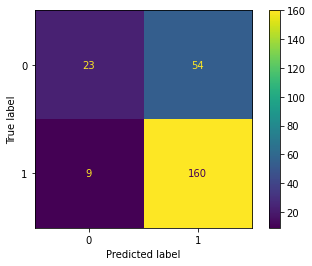

In [150]:
model4=KNeighborsClassifier()
parameters={'n_neighbors':[10,12,14],'weights':['uniform','distance'],'algorithm':['auto']}
gscv4=GridSearchCV(model4,param_grid=parameters)
gscv4.fit(x_train,y_train)
y_pred=gscv4.predict(x_test)
cf_r=classification_report(y_test,y_pred)  
print('Accuracy on test data ', gscv4.score(x_test,y_test))
print('Accuracy on train data ', gscv4.score(x_train,y_train))
print(plot_confusion_matrix(gscv4,x_test,y_test,values_format='0.3g'))
print('Classification Report :\n',cf_r)

In [151]:
gscv4.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

**Deep Learning using Keras**

In [116]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=x_train.shape))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.fit(x_train,y_train,epochs=300,batch_size=6,verbose=0)


In [117]:
print('Accuracy on test data ', model.evaluate(x_test,y_test))
y_pred=model.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)
c_m=confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n',c_m)


8/8 [==============================] - 0s 1ms/step - loss: 0.4852 - acc: 0.8130
Accuracy on test data  [0.48521658778190613, 0.8130081295967102]
Confusion Matrix : 
 [[ 33  44]
 [  2 167]]


# Conclusion

***Out of all the ML/DL models I have tried, most of them were able to have test accuracy of almost 80%. So if anyone is not married,is graduated,has no dependents, is not self employed,has good income and has good credit history will have good chance of loan application being accepted.***